In [1]:
#Time of Day vs Number of Rides V
#Wind Speed vs Number of Rides G (group by windspeed and count num of rides)
#Humidity vs Number of Rides V
#Temperature vs Number of Rides G (group by windspeed and count num of rides))
#Time of Day vs Trip Duration V
#Temperature vs Trip Duration G (Done)
#Zip Code vs Trip Duration V
#Humidity vs Trip Duration G (Done)
#Zip Code vs Number of Rides V
#Time of Day vs Trip Duration G (Done)
#SR_Flag vs Trip Duration G (Done)

#groupby windspeed, then take mean of trip duration

#Combining the data sets all together into one dataframe to compare all together and not month by month!


In [2]:
import pandas as pd 
import glob 
import matplotlib.pyplot as plt
import numpy as np 

Jan = pd.read_csv("RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Feb = pd.read_csv("RideShare_Data_201802.csv", parse_dates=[0], low_memory=False)
Mar = pd.read_csv("RideShare_Data_201803.csv", parse_dates=[0], low_memory=False)
Apr = pd.read_csv("RideShare_Data_201804.csv", parse_dates=[0], low_memory=False)
May = pd.read_csv("RideShare_Data_201805.csv", parse_dates=[0], low_memory=False)
Jun = pd.read_csv("RideShare_Data_201806.csv", parse_dates=[0], low_memory=False)
Jul = pd.read_csv("RideShare_Data_201807.csv", parse_dates=[0], low_memory=False)
Aug = pd.read_csv("RideShare_Data_201808.csv", parse_dates=[0], low_memory=False)
Sep = pd.read_csv("RideShare_Data_201809.csv", parse_dates=[0], low_memory=False)
Oct = pd.read_csv("RideShare_Data_201810.csv", parse_dates=[0], low_memory=False)
Nov = pd.read_csv("RideShare_Data_201811.csv", parse_dates=[0], low_memory=False)
Dec = pd.read_csv("RideShare_Data_201812.csv", parse_dates=[0], low_memory=False)
Yearly_Data = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])
Yearly_Data['Time'] = [d.time() for d in Yearly_Data['Pickup_DateTime']]
Yearly_Data[['Hour','Minute','Second']] = Yearly_Data['Time'].astype(str).str.split(':', expand=True).astype(int)


In [3]:
Yearly_Data.head()

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description,Time,Hour,Minute,Second
0,2018-01-01 22:22:00,1/1/18 22:44,205.0,63.0,1.0,"Saint Albans, Queens","Cypress Hills, Brooklyn",11366,11216,22.750000,17,34,3,800,Clear,sky is clear,22:22:00,22,22,0
1,2018-01-01 12:44:00,1/1/18 13:12,125.0,93.0,0.0,"Hudson Sq, Manhattan","Flushing Meadows-Corona Park, Queens",10024,11366,28.033333,6,60,2,800,Clear,sky is clear,12:44:00,12,44,0
2,2018-01-01 00:28:00,1/1/18 0:41,39.0,71.0,1.0,"Canarsie, Brooklyn","East Flatbush/Farragut, Brooklyn",11216,11216,13.116667,11,43,4,800,Clear,sky is clear,00:28:00,0,28,0
3,2018-01-01 02:42:00,1/1/18 2:56,100.0,137.0,0.0,"Garment District, Manhattan","Kips Bay, Manhattan",10024,10024,13.850000,9,46,5,800,Clear,sky is clear,02:42:00,2,42,0
4,2018-01-01 14:15:00,1/1/18 14:37,55.0,115.0,0.0,"Coney Island, Brooklyn","Grymes Hill/Clifton, Staten Island",11216,10306,22.150000,8,60,2,800,Clear,sky is clear,14:15:00,14,15,0


In [4]:
Yearly_Data['Time']

0         22:22:00
1         12:44:00
2         00:28:00
3         02:42:00
4         14:15:00
5         04:44:00
6         02:39:00
7         03:46:00
8         05:34:00
9         13:59:00
10        03:45:00
11        23:40:00
12        04:20:00
13        01:07:00
14        00:33:00
15        01:35:00
16        01:02:00
17        04:14:00
18        18:15:00
19        13:33:00
20        10:43:00
21        19:04:00
22        13:19:00
23        14:41:00
24        06:32:00
25        19:56:00
26        04:00:00
27        03:33:00
28        22:26:00
29        01:20:00
            ...   
261524    20:10:38
261525    15:05:33
261526    18:19:55
261527    19:20:31
261528    20:00:56
261529    18:17:31
261530    21:23:33
261531    15:01:24
261532    17:26:09
261533    18:13:41
261534    01:58:36
261535    17:35:04
261536    12:32:53
261537    15:38:12
261538    17:01:52
261539    11:16:27
261540    05:49:44
261541    20:19:34
261542    01:10:49
261543    22:24:06
261544    20:21:00
261545    08

In [5]:
Yearly_Data['Trip_Duration']

0         22.750000
1         28.033333
2         13.116667
3         13.850000
4         22.150000
5         16.833333
6          8.533333
7          5.783333
8          5.666667
9          9.416667
10        14.266667
11         5.783333
12        11.600000
13        16.550000
14        67.183333
15         5.783333
16         9.016667
17         5.750000
18        31.066667
19         8.016667
20        22.900000
21         8.750000
22        11.083333
23        18.300000
24        27.333333
25         8.033333
26         7.400000
27        30.350000
28         9.550000
29         5.750000
            ...    
261524     9.000000
261525    16.000000
261526     5.000000
261527    51.000000
261528     5.000000
261529    31.000000
261530    34.000000
261531    15.000000
261532    22.000000
261533    13.000000
261534     9.000000
261535    28.000000
261536    16.000000
261537     9.000000
261538    35.000000
261539    19.000000
261540    13.000000
261541     8.000000
261542    25.000000


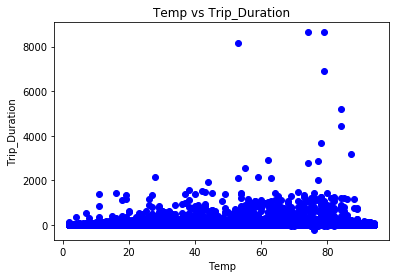

In [6]:
#No significant or unique correlations found
x_axis = Yearly_Data['Temp']
y_axis = Yearly_Data['Trip_Duration']

plt.title("Temp vs Trip_Duration")
plt.xlabel("Temp")
plt.ylabel("Trip_Duration")

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()

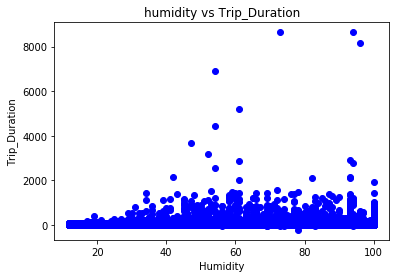

In [7]:
#No significant or unique correlations found
x_axis = Yearly_Data['humidity']
y_axis = Yearly_Data['Trip_Duration']

plt.title("humidity vs Trip_Duration")
plt.xlabel("Humidity")
plt.ylabel("Trip_Duration")

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()

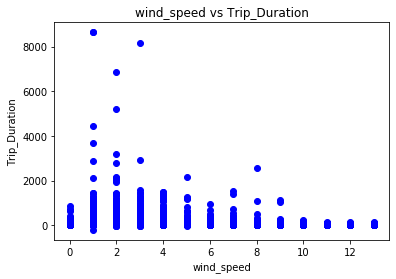

In [8]:
#No significant or unique correlations found (changed 'Time' to 'wind_speed')
x_axis = Yearly_Data['wind_speed']
y_axis = Yearly_Data['Trip_Duration']

plt.title("wind_speed vs Trip_Duration")
plt.xlabel("wind_speed")
plt.ylabel("Trip_Duration")

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()

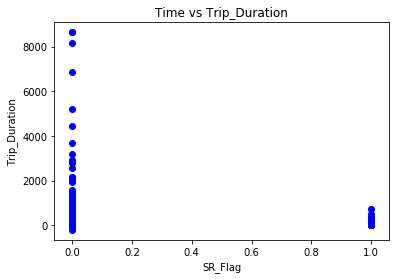

In [9]:
#Show group; SR_Flag is the type of Uber rider (Pool, Single, etc...)
x_axis = Yearly_Data['SR_Flag']
y_axis = Yearly_Data['Trip_Duration']

plt.title("Time vs Trip_Duration")
plt.xlabel("SR_Flag")
plt.ylabel("Trip_Duration")

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()

In [10]:
#Perform a count
Yearly_Data.count()

Pickup_DateTime        3009575
DropOff_datetime       3009575
PUlocationID           3009575
DOlocationID           3009575
SR_Flag                3009575
Pickup_City            3009575
Dropoff_City           3009575
Pickup_ZipCode         3009575
Dropoff_ZipCode        3009575
Trip_Duration          3009575
Temp                   3009575
humidity               3009575
wind_speed             3009575
weather_id             3009575
weather_main           3009575
weather_description    3009575
Time                   3009575
Hour                   3009575
Minute                 3009575
Second                 3009575
dtype: int64

In [11]:
Yearly_Data['wind_speed'].count

<bound method Series.count of 0         3
1         2
2         4
3         5
4         2
5         4
6         5
7         5
8         4
9         2
10        5
11        1
12        5
13        5
14        5
15        4
16        5
17        5
18        4
19        2
20        2
21        4
22        2
23        3
24        4
25        1
26        5
27        5
28        3
29        5
         ..
261524    5
261525    2
261526    3
261527    3
261528    5
261529    3
261530    3
261531    2
261532    3
261533    3
261534    3
261535    3
261536    1
261537    2
261538    3
261539    1
261540    2
261541    5
261542    3
261543    3
261544    5
261545    2
261546    2
261547    2
261548    4
261549    3
261550    3
261551    2
261552    2
261553    3
Name: wind_speed, Length: 3009575, dtype: int64>

In [12]:
Yearly_Data.wind_speed.count()

3009575

In [13]:
Yearly_Data.Time.min()

datetime.time(0, 0)

In [14]:
Yearly_Data.Time.max()

datetime.time(23, 59, 59)

In [15]:
Yearly_Data.wind_speed.min()

0

In [16]:
Yearly_Data.wind_speed.max()

13

In [17]:
Yearly_Data.weather_description.min()

'Sky is Clear'

In [18]:
Yearly_Data.weather_description.max()

'very heavy rain'

In [19]:
Yearly_Data.weather_main.min()

'Clear'

In [20]:
Yearly_Data.weather_main.max()

'Thunderstorm'

In [21]:
Yearly_Data.weather_id.min()

200

In [24]:
Yearly_Data.weather_id.max()

804

In [25]:
#Extra no need but I did incase
Yearly_Data.groupby('wind_speed').mean()

,PUlocationID,DOlocationID,SR_Flag,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,weather_id,Hour,Minute,Second
wind_speed,,,,,,,,,,,,
0,137.215324,137.379266,0.282227,10630.675749,10612.269788,20.335296,57.501238,71.002009,714.386394,10.878523,29.348085,28.540786
1,138.004895,136.876041,0.289515,10617.155004,10615.700624,20.195952,63.017196,69.210863,719.689168,12.944059,29.395762,27.687881
2,138.268089,136.999803,0.289836,10611.512783,10613.741035,20.236217,58.741418,66.909306,721.971812,13.349833,29.365436,26.861351
3,138.051856,136.831891,0.290154,10608.241508,10615.286301,19.943795,53.469453,64.780472,718.638202,13.539178,29.397188,26.430512
4,138.566320,136.942563,0.289075,10606.163633,10613.316473,19.855994,49.152771,63.751191,715.233727,13.665885,29.412765,26.369618
5,138.618944,136.961071,0.291746,10602.496455,10613.377920,19.925128,48.820163,60.728520,709.758861,14.490099,29.410970,26.605962
6,138.396728,137.127720,0.288481,10605.700982,10612.245414,19.736044,45.060704,58.315580,718.956549,14.996076,29.339955,27.566517
7,138.491540,137.661957,0.287680,10600.086107,10610.842052,19.723810,44.505370,58.142826,708.920073,15.119986,29.404808,27.381940
8,138.780542,137.769709,0.292712,10596.040285,10603.386742,19.850795,43.167378,62.417718,698.525325,15.656169,29.340079,27.908034


In [26]:
Yearly_Data.groupby('wind_speed').count()

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,weather_id,weather_main,weather_description,Time,Hour,Minute,Second
wind_speed,,,,,,,,,,,,,,,,,,,
0,36336,36336,36336,36336,36336,36336,36336,36336,36336,36336,36336,36336,36336,36336,36336,36336,36336,36336,36336
1,677370,677370,677370,677370,677370,677370,677370,677370,677370,677370,677370,677370,677370,677370,677370,677370,677370,677370,677370
2,782039,782039,782039,782039,782039,782039,782039,782039,782039,782039,782039,782039,782039,782039,782039,782039,782039,782039,782039
3,592754,592754,592754,592754,592754,592754,592754,592754,592754,592754,592754,592754,592754,592754,592754,592754,592754,592754,592754
4,405456,405456,405456,405456,405456,405456,405456,405456,405456,405456,405456,405456,405456,405456,405456,405456,405456,405456,405456
5,217758,217758,217758,217758,217758,217758,217758,217758,217758,217758,217758,217758,217758,217758,217758,217758,217758,217758,217758
6,143219,143219,143219,143219,143219,143219,143219,143219,143219,143219,143219,143219,143219,143219,143219,143219,143219,143219,143219
7,73467,73467,73467,73467,73467,73467,73467,73467,73467,73467,73467,73467,73467,73467,73467,73467,73467,73467,73467
8,42646,42646,42646,42646,42646,42646,42646,42646,42646,42646,42646,42646,42646,42646,42646,42646,42646,42646,42646


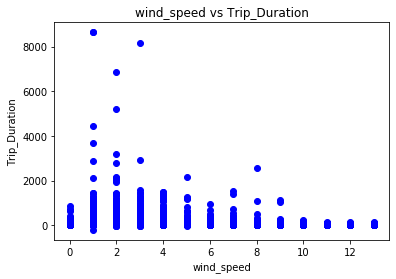

In [27]:
#After grouping and counting I graphed 'wind_speed' vs 'Trip_Duration'
x_axis = Yearly_Data['wind_speed']
y_axis = Yearly_Data['Trip_Duration']

plt.title("wind_speed vs Trip_Duration")
plt.xlabel("wind_speed")
plt.ylabel("Trip_Duration")

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()

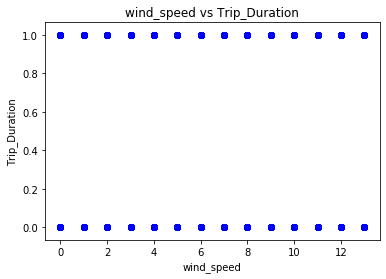

In [28]:
#could not find the number of rides in the CSV so i graphed 'SR_Flag' vs 'wind_speed'
x_axis = Yearly_Data['wind_speed']
y_axis = Yearly_Data['SR_Flag']

plt.title("wind_speed vs Trip_Duration")
plt.xlabel("wind_speed")
plt.ylabel("Trip_Duration")

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()
#HAHAHAH

In [29]:
#groupby windspeed, then take mean of trip duration
Yearly_Data.groupby('wind_speed')

In [30]:
Yearly_Data['Trip_Duration'].mean()

20.047124311573103

In [31]:
Yearly_Data['Trip_Duration'].count()

3009575

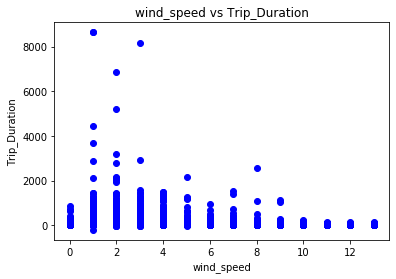

In [32]:
x_axis = Yearly_Data['wind_speed']
y_axis = Yearly_Data['Trip_Duration']

plt.title("wind_speed vs Trip_Duration")
plt.xlabel("wind_speed")
plt.ylabel("Trip_Duration")

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()

In [33]:
Yearly_Data['wind_speed'].mean()

2.9313444589352318

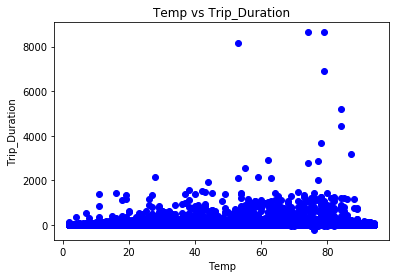

In [34]:
#Temp vs Trip_Duration ----> No correlation 
x_axis = Yearly_Data['Temp']
y_axis = Yearly_Data['Trip_Duration']

plt.title("Temp vs Trip_Duration")
plt.xlabel("Temp")
plt.ylabel("Trip_Duration")

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()

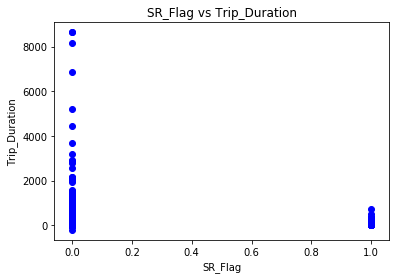

In [35]:
x_axis = Yearly_Data['SR_Flag']
y_axis = Yearly_Data['Trip_Duration']

plt.title("SR_Flag vs Trip_Duration")
plt.xlabel("SR_Flag")
plt.ylabel("Trip_Duration")

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()

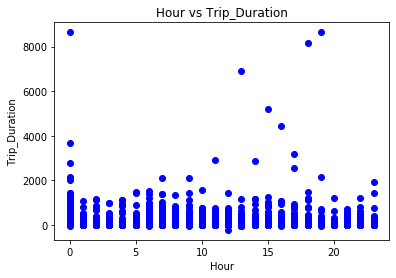

In [36]:
#Hour vs Trip_Duration
x_axis = Yearly_Data['Hour']
y_axis = Yearly_Data['Trip_Duration']

plt.title("Hour vs Trip_Duration")
plt.xlabel("Hour")
plt.ylabel("Trip_Duration")

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()

In [37]:
Yearly_Data.head()

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description,Time,Hour,Minute,Second
0,2018-01-01 22:22:00,1/1/18 22:44,205.0,63.0,1.0,"Saint Albans, Queens","Cypress Hills, Brooklyn",11366,11216,22.750000,17,34,3,800,Clear,sky is clear,22:22:00,22,22,0
1,2018-01-01 12:44:00,1/1/18 13:12,125.0,93.0,0.0,"Hudson Sq, Manhattan","Flushing Meadows-Corona Park, Queens",10024,11366,28.033333,6,60,2,800,Clear,sky is clear,12:44:00,12,44,0
2,2018-01-01 00:28:00,1/1/18 0:41,39.0,71.0,1.0,"Canarsie, Brooklyn","East Flatbush/Farragut, Brooklyn",11216,11216,13.116667,11,43,4,800,Clear,sky is clear,00:28:00,0,28,0
3,2018-01-01 02:42:00,1/1/18 2:56,100.0,137.0,0.0,"Garment District, Manhattan","Kips Bay, Manhattan",10024,10024,13.850000,9,46,5,800,Clear,sky is clear,02:42:00,2,42,0
4,2018-01-01 14:15:00,1/1/18 14:37,55.0,115.0,0.0,"Coney Island, Brooklyn","Grymes Hill/Clifton, Staten Island",11216,10306,22.150000,8,60,2,800,Clear,sky is clear,14:15:00,14,15,0


In [38]:
zip_code = Yearly_Data[["Pickup_DateTime","Pickup_ZipCode"]]
zip_code.head()

,Pickup_DateTime,Pickup_ZipCode
0,2018-01-01 22:22:00,11366
1,2018-01-01 12:44:00,10024
2,2018-01-01 00:28:00,11216
3,2018-01-01 02:42:00,10024
4,2018-01-01 14:15:00,11216


In [39]:
zip_code_group = zip_code.groupby("Pickup_ZipCode").count().reset_index()
zip_code_group.head()

,Pickup_ZipCode,Pickup_DateTime
0,7114,383
1,10001,54294
2,10003,42948
3,10004,819
4,10007,38010


In [40]:
zip_code_df =zip_code_group.rename(columns={"Pickup_DateTime":"Count"})
zip_code_df.head()
zip_code_df.sort_values("Count",ascending = False,inplace=True)
zip_code_df = zip_code_df.reset_index()
zip_code_df = zip_code_df.head(10)
zip_code_df


,index,Pickup_ZipCode,Count
0,10,10024,998735
1,37,11216,710315
2,44,11366,406937
3,25,10462,209576
4,14,10036,62975
5,1,10001,54294
6,2,10003,42948
7,4,10007,38010
8,46,11371,37262
9,21,10451,36313


In [ ]:
pickup_zipcode = zip_code_df["Pickup"]

ValueError: 'label' must be of length 'x'

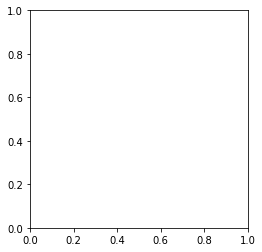

In [56]:
#explode = [0,0,0,0,0,0,0,0,0,0.1]
#colors = [maroon,blue,pink,yellow,green,brown,purple,olive,orange,orchid]
plt.pie(zip, explode=explode, labels='Pickup_Zipcode', #colors=colors,
        autopct="%11.1f%%", shadow=True, startangle=170)
#plt.show()

In [58]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data zipcode
    zip_code_df
    # with the labels being zipcodes
    labels=['Pickup_ZipCode']
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with no slide exploded out
    explode=(0,0,0,0,0,0,0,0,0,0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (<ipython-input-58-4c0d6621296e>, line 9)